In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [67]:
df = pd.read_csv('data/churn.csv')

In [3]:
df.head()



,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [68]:
df['churn'] = np.where(pd.to_datetime(df['last_trip_date']).dt.month > 5, 0, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
churn                     50000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [117]:
num_vars = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver','surge_pct','avg_surge','trips_in_first_30_days','weekday_pct']
cat_vars = ['city','phone','luxury_car_user', 'churn']


In [70]:
# df.loc[df['city']=='Winterfell', 'city'] = 1
# df.loc[df['city']=='Astapor', 'city'] = 2
# df.loc[df['city']=="King's Landing", 'city'] = 3 
df.loc[df['phone']=="iPhone", 'phone'] = 0
df.loc[df['phone']=="Android", 'phone'] = 1

In [82]:
df = pd.concat([df, pd.get_dummies(df['city'])], axis=1).drop('city',axis=1)

KeyError: 'city'

In [81]:
df[cat_vars].head()

KeyError: "['city'] not in index"

In [220]:
# df = df.drop(['last_trip_date','signup_date','Winterfell'],axis=1)
df = df.drop(['Winterfell'],axis=1)

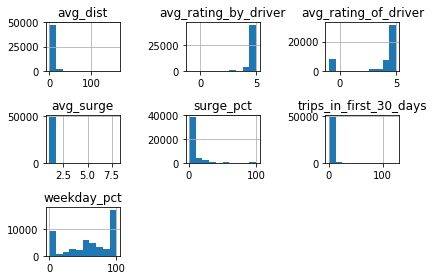

In [84]:
df[num_vars].hist(bins=10)
plt.tight_layout()
plt.show()

/home/tomas/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/tomas/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/tomas/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/tomas/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/tomas/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


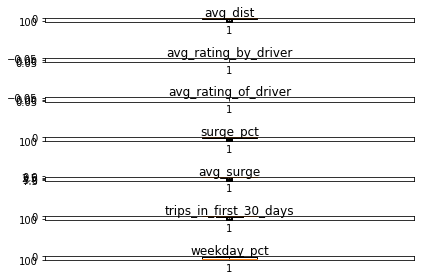

In [74]:
fig, axes = plt.subplots(7,1)
for ax, var in zip(axes.ravel(), num_vars):
    ax.boxplot(df[var])
    ax.set_title(var)
plt.tight_layout()
plt.show()

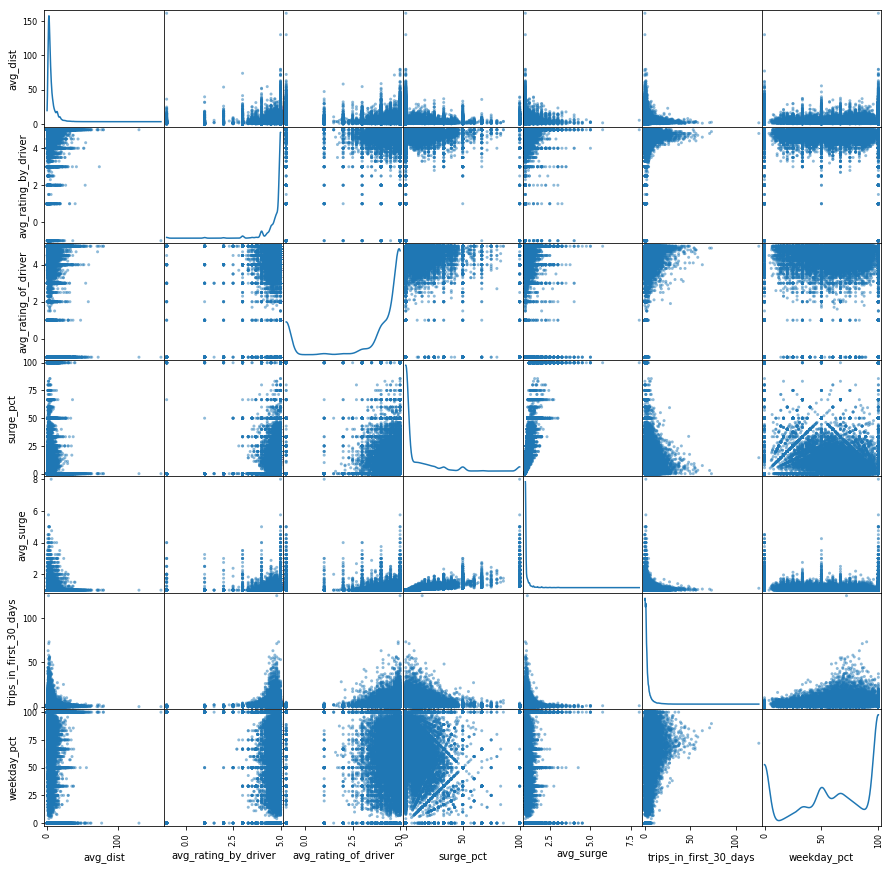

In [118]:
from pandas.plotting import scatter_matrix
ax = scatter_matrix(df[num_vars],figsize=(15,15),diagonal = 'kde')
plt.show()

In [14]:
df[num_vars].plot(kind="scatter")

ValueError: scatter requires and x and y column

In [85]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df.shape[0]
missing_df.sort_values('missing_ratio', ascending=False)

,column_name,missing_count,missing_ratio
0,avg_dist,0,0.0
1,avg_rating_by_driver,0,0.0
2,avg_rating_of_driver,0,0.0
3,avg_surge,0,0.0
4,phone,0,0.0
5,surge_pct,0,0.0
6,trips_in_first_30_days,0,0.0
7,luxury_car_user,0,0.0
8,weekday_pct,0,0.0
9,churn,0,0.0


In [86]:
df.fillna(-1, inplace=True)

In [221]:
X = df.drop('churn',axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    

In [222]:
log = LR()
mod = log.fit(X_train,y_train)


In [223]:
y_pred = mod.predict_proba(X_test)[:, 1]

In [125]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list
    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    
    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)

    return tprs, fprs, thresholds.tolist()

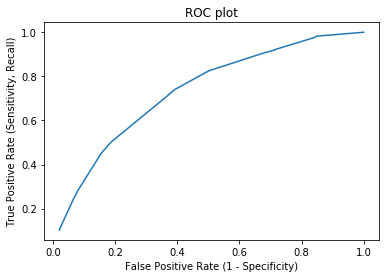

In [126]:
tpr, fpr, thresholds = roc_curve(y_pred, y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot")
plt.show()

In [224]:
index = np.argsort(np.e**mod.coef_[0])[::-1]

for t, b in zip(X.columns[index],np.e**mod.coef_[0][index]):
    print("{} {:10.4f}".format(t,b))


phone     1.5959
Astapor     1.2776
avg_dist     1.2179
avg_rating_by_driver     1.0423
avg_surge     1.0325
weekday_pct     1.0041
surge_pct     0.9298
avg_rating_of_driver     0.7892
trips_in_first_30_days     0.6773
luxury_car_user     0.6526
King's Landing     0.6280


In [201]:
import statsmodels.api as sm

logit = sm.Logit(y_train, X_train)

result = logit.fit()
result.summary()

         Current function value: 0.590358
         Iterations: 35


/home/tomas/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tomas/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/home/tomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/tomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/tomas/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39989
Method:                           MLE   Df Model:                           10
Date:                Fri, 01 Dec 2017   Pseudo R-squ.:                  0.1067
Time:                        15:18:46   Log-Likelihood:                -23614.
converged:                      False   LL-Null:                       -26436.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1583      0.012     13.120      0.000       0.135       0.182
x2             0.0346      0.011      3.163      0.002       0.013       0.056
x3            -0.1853      0.012    -15.937      0.000      -0.208      -0.162
x4             0.0457      0.018      2.476      0.013       0.010       0.082
x5             0.4154      0.011     36.492      0.000       0.393       0.438
x6            -0.0762      0.018     -4.156      0.000      -0.112      -0.040
x7            -0.4793      0.017    -28.965      0.000      -0.512      -0.447
x8            -0.3913      0.011    -34.508      0.000      -0.414      -0.369
x9             0.0176      0.011      1.565      0.117      -0.004       0.040
x10            0.2844        nan        nan        nan         nan         nan
x11           -0.4327        nan        nan        nan         nan         nan
x12            0.0807        nan        nan        nan         nan         nan
==============================================================================
"""

In [213]:
np.e**mod.coef_


array([[ 1.20998444,  1.03611371,  0.78494398,  1.03497619,  1.60320893,
         0.92994047,  0.66733432,  0.66238422,  1.0050202 ,  1.34802332,
         0.65533319,  1.06111239]])

In [129]:
def make_clean_churn_df(df):
    """Cleans DataFrame loaded from churn.csv.
    Parameters
    ----------
    df : DataFrame
    Returns
    -------
    DataFrame : Columns lowercased, spaces replaced with underscores,
                Text data replaced with binarized ints.
    """

    df['churn'] = np.where(pd.to_datetime(df['last_trip_date']).dt.month > 5, 0, 1)


    df.loc[df['phone']=="iPhone", 'phone'] = 0
    df.loc[df['phone']=="Android", 'phone'] = 1
    df = pd.concat([df, pd.get_dummies(df['city'])], axis=1).drop('city',axis=1)
    df = df.drop(['last_trip_date','signup_date'],axis=1)
    df.fillna(-1, inplace=True)
    
    return df


In [166]:
df = make_clean_churn_df(pd.read_csv('data/churn.csv'))

In [134]:
def roc_curve1(probabilities, labels, label):
   thresholds = np.sort(probabilities)
   tprs = []
   fprs = []
   num_positive_cases = sum(labels)
   num_negative_cases = len(labels) - num_positive_cases

   for threshold in thresholds:
       # With this threshold, give the prediction of each instance
       predicted_positive = probabilities >= threshold
       # Calculate the number of correctly predicted positive cases
       true_positives = np.sum(predicted_positive * labels)
       # Calculate the number of incorrectly predicted positive cases
       false_positives = np.sum(predicted_positive) - true_positives
       # Calculate the True Positive Rate
       tpr = true_positives / float(num_positive_cases)
       # Calculate the False Positive Rate
       fpr = false_positives / float(num_negative_cases)
       fprs.append(fpr)
       tprs.append(tpr)        
   plt.plot(fprs, tprs, label=label)

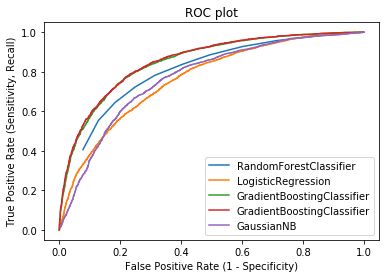

In [225]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.naive_bayes import GaussianNB as NB

models = [RF(), LR(), GBC(), GBC(n_estimators=1000, learning_rate= 0.01,max_depth=5, max_features='sqrt'), NB()]
for model in models:
   m = model
   m.fit(X_train, y_train)
   y_pred = m.predict_proba(X_test)[:, 1]
   roc_curve1(y_pred, y_test, label=model.__class__.__name__)  
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot")
plt.legend()
plt.show()

In [121]:
df['avg_dist'] = np.where(df['avg_dist'] > 15, 1, 0)

df['avg_rating_by_driver'] = np.where(df['avg_rating_by_driver'] < 4.5, 1, 0)

df['avg_rating_of_driver'] = np.where(df['avg_rating_of_driver'] < 4, 1, 0)

df['avg_surge'] = np.where(df['avg_surge'] > 1.5, 1, 0)

df['surge_pct'] = np.where(df['surge_pct'] > 20, 1, 0)

df['trips_in_first_30_days'] = np.where(df['trips_in_first_30_days'] > 15, 1, 0)

df['luxury_car_user'] = np.where(df['luxury_car_user'] == True, 1, 0)



del df['weekday_pct']

df = df.dropna(axis=1, how='any')

In [158]:
def standard_confusion_matrix(y_true, y_predict):
   tn, fp, fn, tp = confusion_matrix(y_true, y_predict).ravel()
   return np.array([[tp, fn], [fp, tn]])

def profit_curve(cost_benefit, predicted_probs, labels):
   index = np.argsort(predicted_probs)[::-1]
   predicted_probs = predicted_probs[index]
   labels = labels[index]
   n = len(predicted_probs)
   y_predict = np.zeros(n)  
   profits = []
   threshold = []
   for i in range(n):
       y_predict[:i] = 1
       confusion_matrix_x = standard_confusion_matrix(labels, y_predict)
       profit = (confusion_matrix_x  * cost_benefit).sum()
       profits.append(profit)
       threshold.append(1.*i/n)
   return profits, threshold

def plot_profit_curve(model, cost_benefit, X_train, X_test, y_train, y_test):
   m = model
   m.fit(X_train, y_train)
   y_predict = m.predict_proba(X_test)[:, 1]
   profits, threshold = profit_curve(cost_benefit, y_predict, y_test.values)  
   plt.plot(threshold, profits, label=model.__class__.__name__)

In [159]:
cost_benefit = np.array([[98, 0], [-2,0]])

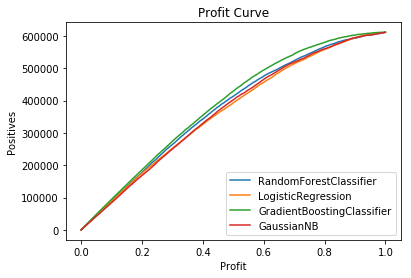

In [226]:
models = [RF(), LR(), GBC(), NB()]
for model in models:
   plot_profit_curve(model, cost_benefit,X_train, X_test, y_train,y_test)  
plt.xlabel("Profit")
plt.ylabel("Positives")
plt.title("Profit Curve")
plt.legend()
plt.show()